0.6738684
-0.5231481


Text(0.5, 1.0, 'Right_y')

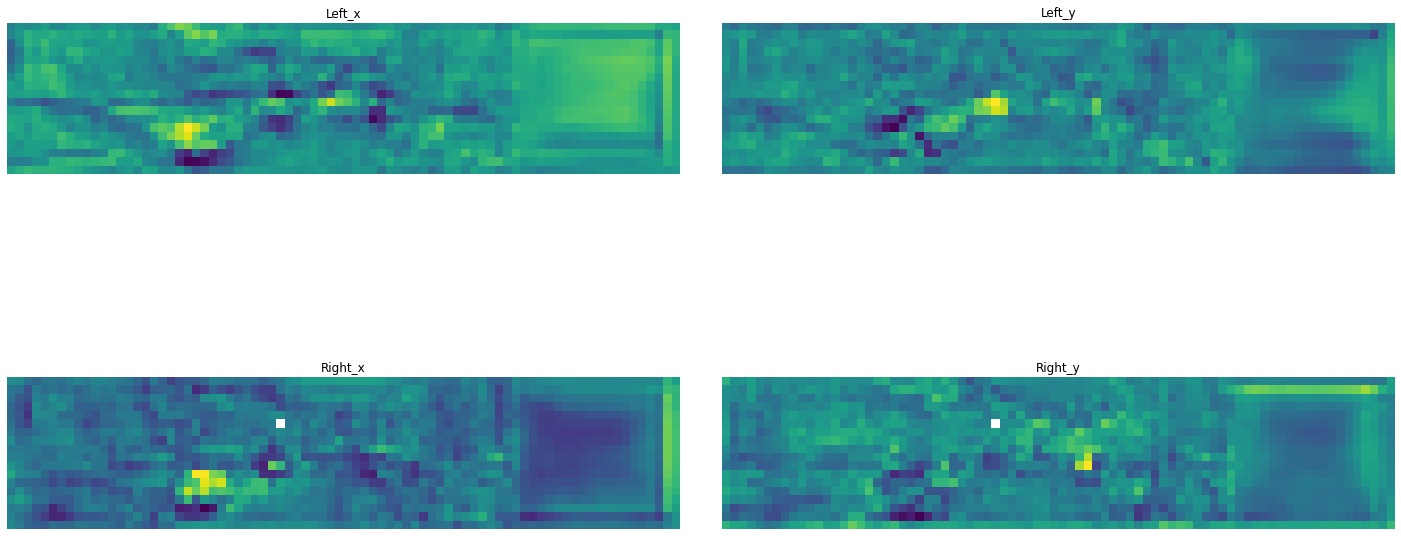

In [3]:
IMAGE_PATH = "/home/lab530/KenYu/visualDet3D/kitti/training/image_2/000008.png"
LABEL_PATH = "/home/lab530/KenYu/visualDet3D/kitti/training/label_2/000008.txt"
INPUT_PKL = "/home/lab530/KenYu/visualDet3D/WGAC_flow_field.pkl"

import cv2 
import pickle
import matplotlib.pyplot as plt

with open(INPUT_PKL, 'rb') as f:
    t = pickle.load(f)
arr = t.cpu().numpy()

# plt.imshow(arr[:, :, 0])


print(arr[0, :, :].max())
print(arr[0, :, :].min())

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.tight_layout()
fig.set_facecolor('white')
[b.axis('off') for a in ax for b in a ]# Delete all axis
# plotting the points 
ax[0, 0].imshow(arr[0, :, :])
ax[0, 0].set_title('Left_x')
# 
ax[0, 1].imshow(arr[1, :, :])
ax[0, 1].set_title('Left_y')
# 
ax[1, 0].imshow(arr[2, :, :])
ax[1, 0].set_title('Right_x')
# 
ax[1, 1].imshow(arr[3, :, :])
ax[1, 1].set_title('Right_y')
# 


(134, 184, 247)
(159, 127, 92)
(217, 18, 189)
(120, 108, 150)
(125, 244, 20)
(196, 228, 127)
(200, 205, 64)
(181, 20, 126)
(166, 156, 76)
(83, 236, 179)
(131, 145, 65)
(34, 128, 125)
(8, 31, 35)
(227, 9, 238)
(213, 116, 71)
(60, 105, 32)
(113, 81, 60)
(145, 231, 94)
(63, 11, 41)
(118, 130, 134)
(132, 253, 115)
(117, 226, 49)
(92, 140, 113)
(228, 230, 75)
(229, 89, 52)
(220, 233, 157)
(235, 58, 247)
(174, 178, 54)
(92, 47, 20)
(130, 58, 21)
(191, 168, 21)
(245, 51, 40)


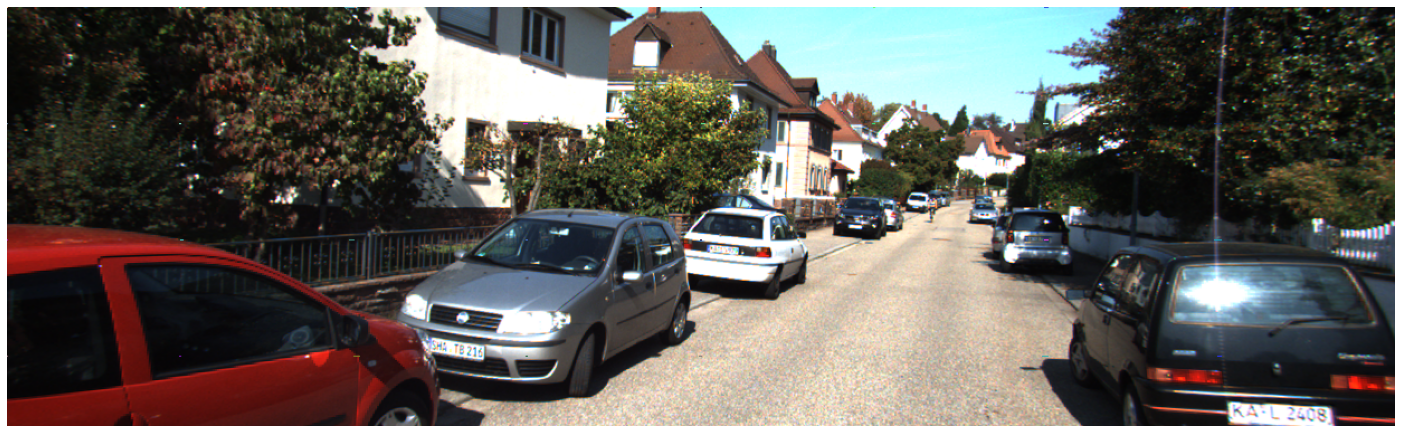

In [2]:
img = cv2.imread(IMAGE_PATH) # [...,::-1]
import numpy as np 
h, w = img.shape[:2]

for x_low_reso in range(80):
    for y_low_reso in range(18):
        # if x_low_reso != 30 or y_low_reso != 15 : continue
        if x_low_reso% 10 != 0 or y_low_reso%5 != 0: continue
        
        x_high_reso, y_high_reso = (int(x_low_reso*w/80), int(y_low_reso*h/18))
        color = np.random.randint(0, 255, size=(3, ))
        color = ( int (color [ 0 ]), int (color [ 1 ]), int (color [ 2 ])) 
        print(color)
        # Left
        img = cv2.arrowedLine(img, 
                              (x_high_reso, y_high_reso), 
                              (int(x_high_reso - arr[0, y_low_reso, x_low_reso]*16) , y_high_reso),
                              color,
                              1)
        
        # Right
        # img = cv2.arrowedLine(img, 
        #                       (x_high_reso, y_high_reso), 
        #                       (int(x_high_reso + arr[1, y_low_reso, x_low_reso]*16) , y_high_reso),
        #                       (0, 255, 0),
        #                       1)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
fig.set_facecolor('white')
fig.tight_layout()
ax.axis('off')
ax.imshow(img[...,::-1])